In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [13]:
# 读取DataFrame
df = pd.read_excel('comments.xlsx',header=0)

# 划分训练集和剩余数据
train_data, remaining_data = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# 划分测试集和验证集
test_data, val_data = train_test_split(remaining_data, test_size=0.5, stratify=remaining_data['label'], random_state=42)

columns = ['pure_text', 'orginial_text', 'len', 'label']
# 保存划分后的数据集为CSV文件
train_data.to_csv('train.csv', index=False, columns=columns)
test_data.to_csv('test.csv', index=False, columns=columns)
val_data.to_csv('val.csv', index=False, columns=columns)


In [14]:
# 定义列名
data = pd.read_csv('train_data.csv')

In [15]:
len(data)

3676

In [16]:
data

,pure_text,orginial_text,len,label
0,Those Schmo's will be hacked and the deliverie...,"['those', 'schmo', ""'s"", 'will', 'be', 'hacked...",14,0
1,One day we will be the robot and the robots wi...,"['one', 'day', 'we', 'will', 'be', 'the', 'rob...",14,0
2,These reporters seem freakishly excited about ...,"['these', 'reporters', 'seem', 'freakishly', '...",7,2
3,I didn't help the robot,"['i', 'did', 'not', 'help', 'the', 'robot']",6,0
4,These punching guys and even their skateboards...,"['these', 'punching', 'guys', 'and', 'even', '...",46,2
...,...,...,...,...
3671,Where can i find these,"['where', 'can', 'i', 'find', 'these']",5,2
3672,Hmm this robot is gonna stuck For an example: ...,"['hmm', 'this', 'robot', 'is', 'going', 'to', ...",53,0
3673,What are you talking about? She is just expres...,"['what', 'are', 'you', 'talking', 'about', 'sh...",16,1
3674,I want this to be real,"['i', 'want', 'this', 'to', 'be', 'real']",6,1


In [17]:
print(data.pure_text.map(lambda x: len(x)).mean())
# 文本长度分布图
print('--------------------------')
print(data['label'].value_counts()) # 标签分布

98.10690968443961
--------------------------
0    1629
2    1121
1     926
Name: label, dtype: int64


count    3676.000000
mean       98.106910
std       112.853248
min         4.000000
25%        39.000000
50%        67.000000
75%       116.000000
max      1799.000000
Name: pure_text, dtype: float64

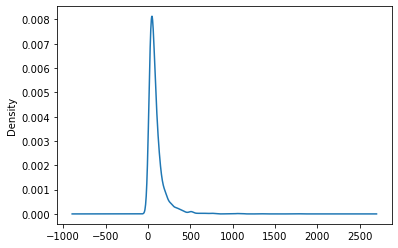

In [18]:
data['text_len']=data['pure_text'].map(len)
data['text_len'].plot(kind='kde')
data['pure_text'].map(len).describe() #查看文本长度分布

train's nums:3676
98.10690968443961
--------------------------
0    1629
2    1121
1     926
Name: label, dtype: int64
--------------------------
               len        label
count  3676.000000  3676.000000
mean     18.221708     0.861806
std      20.222331     0.853930
min       1.000000     0.000000
25%       7.000000     0.000000
50%      13.000000     1.000000
75%      21.000000     2.000000
max     310.000000     2.000000
--------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3676 entries, 0 to 3675
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pure_text      3676 non-null   object
 1   orginial_text  3676 non-null   object
 2   len            3676 non-null   int64 
 3   label          3676 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 115.0+ KB
None
--------------------------
val's nums:460
105.80652173913043
--------------------------
0    204
2    140
1    116
Nam

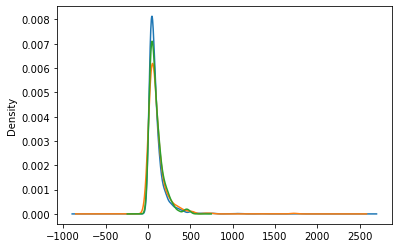

In [19]:
for i in ['train','val','test']:
    data = pd.read_csv('{}.csv'.format(i))
    print('{}\'s nums:{}'.format(i,len(data)))
    # 平均长度
    print(data.pure_text.map(lambda x: len(x)).mean())
    # 文本长度分布图
    print('--------------------------')
    print(data['label'].value_counts()) # 标签分布
    print('--------------------------')
    print(data.describe())
    print('--------------------------')
    print(data.info()) # 查看缺失值
    data['text_len']=data['pure_text'].map(len)
    data['text_len'].plot(kind='kde')
    data['pure_text'].map(len).describe() #查看文本长度分布
    print('--------------------------')

In [21]:
import pandas as pd

In [23]:
df = pd.read_excel('comments.xlsx',header=0)

In [24]:
res = [x for x in df.pure_text]

In [25]:
len(res)

4595

In [29]:
with open('train_test.txt', 'w', encoding='utf-8-sig') as f:
    for i in res:
        f.write(i + '\n')

In [28]:
res

['Calling for a hack!',
 'should have arrested the robot',
 'Dead on the spot  . ',
 'Your food will arrive next year',
 'I saw one today it was Madness',
 'good point, I feel dumb now',
 'how does it cross streets without causing traffic',
 'That one just like fall down the stairs bro',
 "Love it  .   but don't think its safe amongst troublemakers",
 'Guessing these guys have never heard of a crowbar before  .  ',
 'I live in Canada and I want to capture these robots  .  ',
 'The idea is cool but I am kind of scared when this really happens in life  .  ',
 'why would you use a robot delivery service when the store is just 2 blocks away?',
 "More likely flying delivery drones  .   That way they don't have to worry about people  .  ",
 'You could have someone in India driving this thing for 1/5 the wage of a US driver  .  ',
 'I hope the bomb stays warm until the bomb arrives at its location hopefully on time  .  ',
 'When I fall over at least I can get back up, but the robot cant  .  '